# Week3授業前課題2 住宅情報の分析

## 1.このテキストについて

- テキストの目的
- データ分析の基本的な流れを知る
- データ分析ライブラリのPandasに慣れる
- KaggleのNotebooksを利用する

## 2.エイムズ市の住宅価格

アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。


住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。


エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。

## 3.KaggleのNotebooks

Kaggleでは「Notebooks」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。


これ以降Kaggleを利用していきますので、アカウントを作成してください。


《参考Notebooks》

<a href="https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python" target="blank" style="text-decoration: none">
Comprehensive data exploration with Python | Kaggle（まずはここから）
</a>
<br>
<a href="https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner" target="blank" style="text-decoration: none">
House Prices : EDA to ML (Beginner) | Kaggle
</a>
<br>
<a href="https://www.kaggle.com/timolee/a-home-for-pandas-and-sklearn-beginner-how-tos" target="blank" style="text-decoration: none">
A Home for Pandas and Sklearn: Beginner How-Tos | Kaggle
</a>

## 4.データセットの準備

データセットはKaggleからダウンロードします。

<a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques" target="blank" style="text-decoration: none">
House Prices: Advanced Regression Techniques | Kaggle
</a><br>

上記URLを開き、Dataのページへ移動してください。

この中のtrain.csvを使用します。これをダウンロードし、Jupyter Notebookで使っているディレクトリに置いてください。

## 【問題1】データセットの取得
pd.read_csv()を使用して、変数に格納してください。

In [1]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 【問題2】データセット自体の調査
KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください

【説明】

目的変数はSalePrice（ドルでの販売価格）。

アイオワ州エイムスの住宅の様々な側面を説明する79個の説明変数があり、これらを使用して各住宅の最終的な価格を予測する。

## 5.データの概観

## 【問題3】データの確認
データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。


- 各特徴量がどういったものかを見る。（数値データか文字データなど）
- 今回の目的変数はどの列か確認する。
- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [3]:
# 各特徴量がどういったものかを見る。（数値データか文字データなど）
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [26]:
# 今回の目的変数はどの列か確認する。
df.iloc[:, 80].head()  # カラム名：SalePrice 80列目

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [27]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 【問題4】欠損値への対応
欠損値に関して以下のことを行い、レポートしてください。

- 各特徴量の欠損値の有無を確認する。

欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。

In [6]:
# ライブラリインポート
import missingno as msno

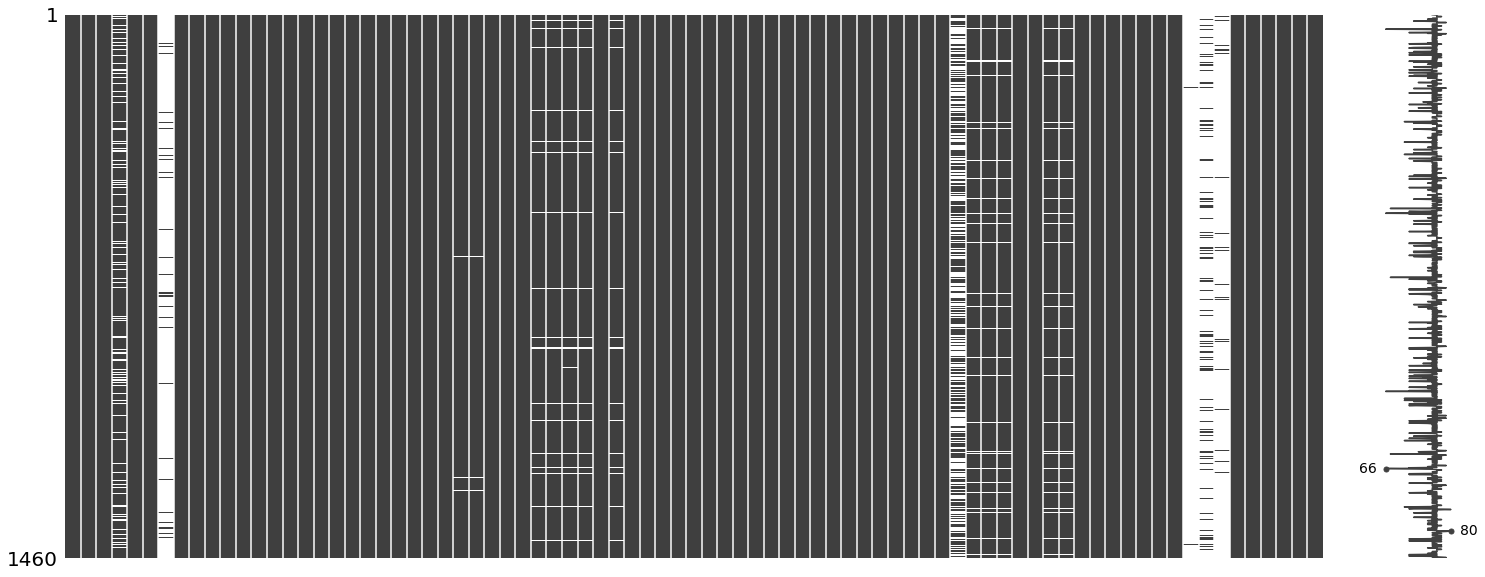

In [7]:
msno.matrix(df)

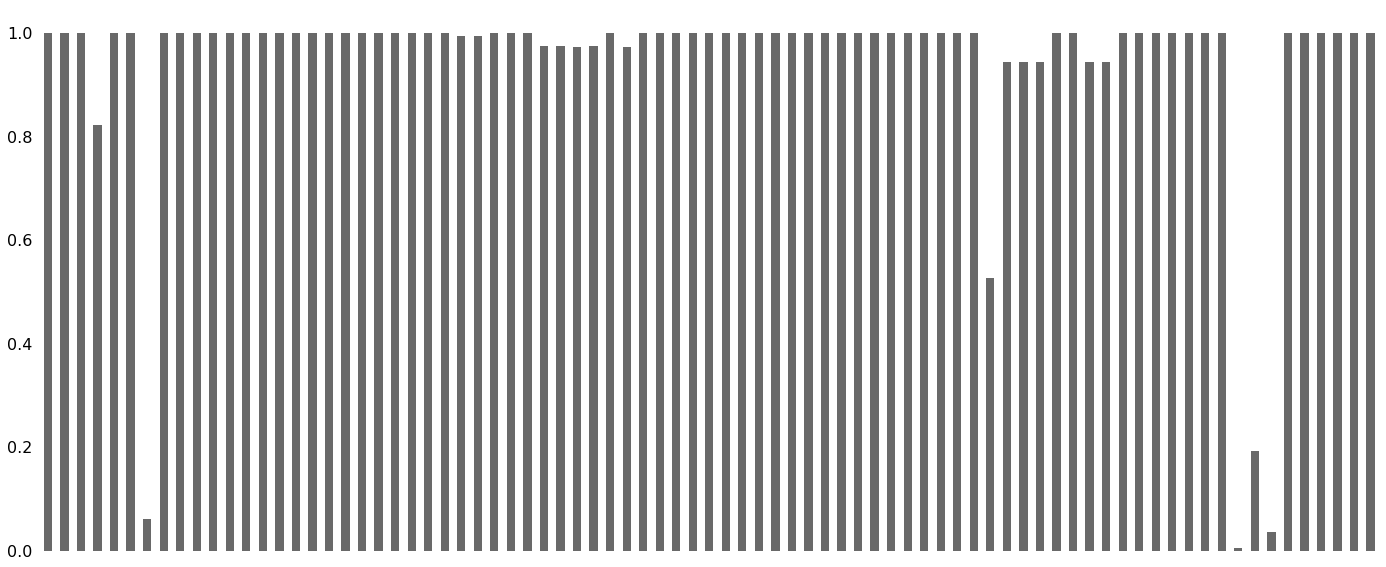

In [8]:
msno.bar(df)

- 欠損値が何パーセント含まれるかを確認する。

(例)

<img src="./img/4.jpg">

In [9]:
# 欠損値の合計を抽出
nan_series = df.isnull().sum()

# DataFrameオブジェクトへ変換
nan_df = pd.DataFrame(data=nan_series, columns={'Total'})
type(nan_df)

pandas.core.frame.DataFrame

In [10]:
# 欠損率を計算してDataFrameへ追加
nan_df['missing_ratio'] = nan_df['Total'].map(lambda x: x/len(df))

# 欠損値が0ではない行のみを抽出
nan_df = nan_df.loc[nan_df['Total'] > 0, :]
nan_df

,Total,missing_ratio
LotFrontage,259,0.177397
Alley,1369,0.937671
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtFinType2,38,0.026027
Electrical,1,0.000685


- 5つ以上欠損値がある特徴量（列）は削除する。
- 欠損値があるサンプル（行）は削除する。


In [11]:
# 欠損値が5つ以上ある行(特徴量)のみ抽出
nan_df = nan_df.loc[nan_df['Total'] > 5, :]
nan_df

,Total,missing_ratio
LotFrontage,259,0.177397
Alley,1369,0.937671
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
BsmtQual,37,0.025342
BsmtCond,37,0.025342
BsmtExposure,38,0.026027
BsmtFinType1,37,0.025342
BsmtFinType2,38,0.026027
FireplaceQu,690,0.472603


In [12]:
# 5つ以上欠損値がある特徴量（列）は削除する。

# 事前確認
print('削除前の列数：{}'.format(df.shape[1]))
print('削除する列数：{}'.format(nan_df.shape[0]))

# 削除するカラム名を取得・表示
drop_columns = nan_df.index.values
print('削除するカラム一覧：\n', drop_columns)

# カラム削除
df2 = df.drop(drop_columns, axis=1)
print('削除後の列数：{}'.format(df2.shape[1]))
df2

削除前の列数：81
削除する列数：18
削除するカラム一覧：
 ['LotFrontage' 'Alley' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageQual' 'GarageCond' 'PoolQC' 'Fence'
 'MiscFeature']
削除後の列数：63


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [13]:
# 欠損値があるサンプル（行）は削除する。

# 事前確認
print('削除前の行列数：', df2.shape)

# 欠損値のある行を削除
df3 = df2.dropna(how='any')

# 削除後の確認
print('削除後の行列数：', df3.shape)

削除前の行列数： (1460, 63)
削除後の行列数： (1459, 63)


## 6.目的変数

次は目的変数がどのような分布を持っているか確認していきます。


## 【問題5】用語の調査
以下の２つの単語を知る必要があります。これらを調査してまとめてください。

- 尖度
- 歪度

<a href="https://bellcurve.jp/statistics/course/17950.html" target="_blank" style="text-decoration: none">
    3-5. 歪度と尖度 | 統計学の時間 | 統計WEB から引用
</a>

尖度
> 分布が正規分布からどれだけ尖っているかを表す統計量。
> 正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）のときには正の値を、正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値をとります。正規分布の場合には0になります。

<img src="./img/6.jpg">


歪度
>分布が正規分布からどれだけ歪んでいるかを表す統計量。
>「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値を、「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値をとります。左右対称の分布（例えば正規分布）の場合には0になります。

<img src="./img/5.jpg">

## 【問題6】分布の確認
- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
- 目的変数に対して対数変換を行う。
- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

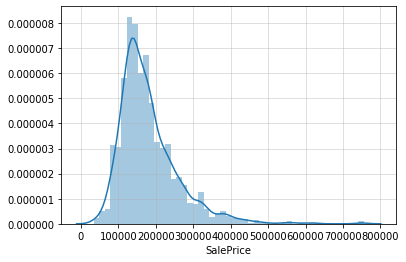

尖度(Kurtosis) : 6.529
歪度(Skewness) : 1.882


In [29]:
# seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
sale_price = df3['SalePrice']
sns.distplot(sale_price)
plt.grid(True, alpha=0.5)
plt.show()

print('尖度(Kurtosis) : {:.3f}'.format(sale_price.kurt()))
print('歪度(Skewness) : {:.3f}'.format(sale_price.skew()))

In [15]:
# 目的変数に対して対数変換を行う。

# 0の値が存在しないことを確認（最小値を確認）
print(sale_price.describe())

# 0が無いため、logXの対数変換を行う
log_sale_price = sale_price.map(np.log)
log_sale_price

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1459, dtype: float64

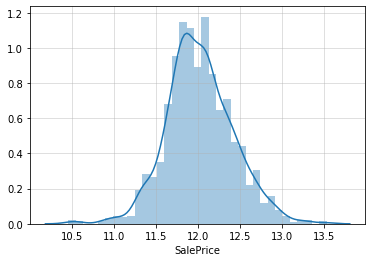

尖度(Kurtosis) : 0.807
歪度(Skewness) : 0.121


In [16]:
# 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
sns.distplot(log_sale_price)
plt.grid(True, alpha=0.5)
plt.show()

print('尖度(Kurtosis) : {:.3f}'.format(log_sale_price.kurt()))
print('歪度(Skewness) : {:.3f}'.format(log_sale_price.skew()))

対数変換後の分布は、尖度・歪度共に0に近く、正規分布に従っているといえる。<br>
一般に、$\log{X}$が正規分布に従う場合、元の確率変数Xは対数正規分布に従う。<br>
逆にいえば、対数変換前の大きな偏りがあるロングテールデータに対して対数変換を行うことで、正規分布に疑似的に従わせることができる。

対数変換の具体的な意味については下記を参照。

<a href="https://atarimae.biz/archives/13161">【参考】対数変換を行う意味について。回帰分析において対数変換する背景にある前提とは？</a>

## 【問題7】相関係数の確認
特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。


- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

**《補足》**

重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

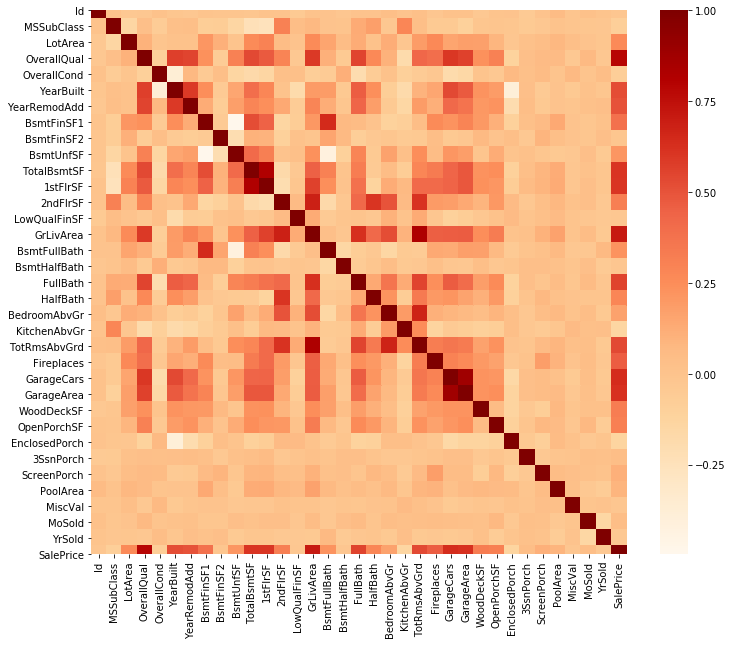

In [17]:
# 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
plt.figure(figsize=(12, 10))
sns.heatmap(df3.corr(), cmap='OrRd')
plt.show()

In [18]:
# 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

# 相関係数の高い順のカラム名を抽出
df_corr = df3.corr().loc[:, 'SalePrice'].sort_values(ascending=False)
print(df_corr.index.values)

# 相関係数TOP10 + Sale_Price のカラム名を抽出
x_list = df_corr.index.values[:11]
print(x_list)

# 相関係数TOP10のデータをデータフレームとして保持
df3_for_heatmap = df3.loc[:, x_list]
df3_for_heatmap.head()

['SalePrice' 'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt'
 'YearRemodAdd' 'Fireplaces' 'BsmtFinSF1' 'WoodDeckSF' '2ndFlrSF'
 'OpenPorchSF' 'HalfBath' 'LotArea' 'BsmtFullBath' 'BsmtUnfSF'
 'BedroomAbvGr' 'ScreenPorch' 'PoolArea' 'MoSold' '3SsnPorch' 'BsmtFinSF2'
 'BsmtHalfBath' 'MiscVal' 'Id' 'LowQualFinSF' 'YrSold' 'OverallCond'
 'MSSubClass' 'EnclosedPorch' 'KitchenAbvGr']
['SalePrice' 'OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea'
 'TotalBsmtSF' '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt'
 'YearRemodAdd']


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000


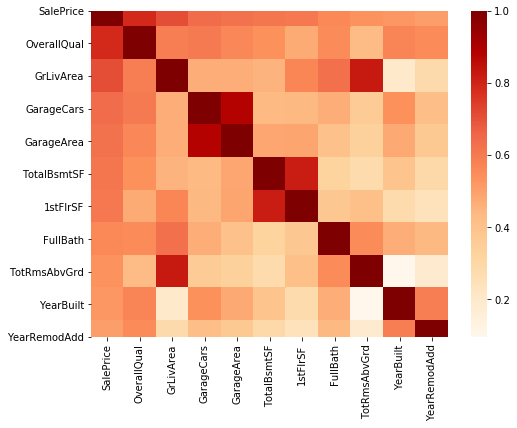

In [19]:
# 相関係数TOP10の相関行列をヒートマップ化
plt.figure(figsize=(8, 6))
sns.heatmap(df3_for_heatmap.corr(), cmap='OrRd')
plt.show()

選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。



- OverallQual：全体的な材料と仕上げの品質
- GrLivArea：グレード（地上）のリビングエリアの平方フィート
- GarageCars：車の容量でのガレージのサイズ
- GarageArea：ガレージの平方フィートでのサイズ
- TotalBsmtSF：地下面積の合計平方フィート
- 1stFlrSF：1階の平方フィート
- FullBath：グレードを超えるフルバスルーム
- TotRmsAbvGrd：グレードを超える部屋の合計（バスルームは含まれません）
- YearBuilt：元の建設日
- YearRemodAdd：改造日

In [20]:
# 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。

import scipy as sp

# 'GarageArea'と'GarageCars'のペア
sp.stats.pearsonr(df3_for_heatmap['GarageArea'], df3_for_heatmap['GarageCars'])

(0.8826130266800473, 0.0)

In [21]:
# 'TotalBsmtSF'と'1stFlrSF'のペア
sp.stats.pearsonr(df3_for_heatmap['TotalBsmtSF'], df3_for_heatmap['1stFlrSF'])

(0.8193932708606789, 0.0)

In [22]:
# 'TotRmsAbvGrd'と'GrLivArea'のペア
sp.stats.pearsonr(df3_for_heatmap['TotRmsAbvGrd'], df3_for_heatmap['GrLivArea'])

(0.8255764500702402, 0.0)